In [1]:
import pandas as pd
import json_lines
import re
import numpy as np

def read_data_from_jl(file_path):
    with open(file_path, 'rb') as f:
        data = json_lines.reader(f)

        df = pd.DataFrame(data)
        
        return df
    return None

In [2]:
df = read_data_from_jl('data/phongtro123.jl')
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/phongtro123.jl'

In [37]:
des = df['description'].values
price = df['price'].values
area = df['area'].values
kind = df['kind'].values
data = pd.DataFrame()

In [38]:
a = []
pattern = '^([0-9]+.[0-9]+|[0-9]+)'
price = df['price'].values
for p in price:
    result = re.findall(pattern, p)
    if result:
        if float(result[0]) > 100:
            a.append(float(result[0])/1000000)
        else:
            a.append(float(result[0]))
    else:
        a.append(0)

data['Price'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price
0,4.50
1,1.80
2,2.50
3,2.00
4,2.20
5,1.00
6,1.50
7,2.00
8,1.35
9,2.80


In [39]:
a = []
pattern1 = '(CCMN|[Cc]hung cư)'
pattern2 = '[Hh]omestay'
for d in des:
    ccmn = re.findall(pattern1, d)
    hs = re.findall(pattern2, d)
    if ccmn:
        a.append("CCMN")
    elif hs:
        a.append("Homestay")
    else:
        a.append("Phòng trọ")

data['Kind'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind
0,4.50,CCMN
1,1.80,Phòng trọ
2,2.50,Phòng trọ
3,2.00,Phòng trọ
4,2.20,Phòng trọ
5,1.00,Phòng trọ
6,1.50,Phòng trọ
7,2.00,Phòng trọ
8,1.35,Phòng trọ
9,2.80,Phòng trọ


In [40]:
data['Location'] = df['location']
data.head(10)

,Price,Kind,Location
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận..."
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,..."
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ..."
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn..."
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ..."
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,..."
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,..."
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ..."
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu..."
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô..."


In [41]:
b = []
pattern = '^[0-9]+'
for a in area:
    result = re.findall(pattern, a)
    if result:
        b.append(int(result[0]))
    else:
        b.append(0)

data['Size'] = pd.Series(np.array(b), index=df.index)
data.head(10)

,Price,Kind,Location,Size
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22


In [42]:
# add parking area
a = []
pattern = '[Đđ]ể xe'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Parking_slot'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind,Location,Size,Parking_slot
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30,0
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20,0
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9,0
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240,1
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22,0


In [43]:
a = []
pattern = '[Đđ]iều hòa'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Air_condition'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind,Location,Size,Parking_slot,Air_condition
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0,0
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1,0
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1,0
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0,0
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1,1
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30,0,0
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20,0,0
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9,0,0
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240,1,0
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22,0,1


In [44]:
a = []
pattern = '[Nn]óng lạnh'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Heater_shower'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0,0,1
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1,0,1
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1,0,1
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0,0,0
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1,1,1
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30,0,0,1
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20,0,0,0
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9,0,0,0
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240,1,0,0
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22,0,1,1


In [45]:
a = []
pattern = '([Tt]ủ|[Ff]ull đồ|tivi|nội thất đầy đủ)'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Furnish'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0,0,1,1
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1,0,1,0
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1,0,1,1
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0,0,0,0
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1,1,1,0
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30,0,0,1,1
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20,0,0,0,0
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9,0,0,0,0
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240,1,0,0,1
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22,0,1,1,1


In [46]:
a = []
pattern = 'khép kín'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Inner_toilet'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0,0,1,1,0
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1,0,1,0,0
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1,0,1,1,0
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0,0,0,0,0
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1,1,1,0,1
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30,0,0,1,1,1
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20,0,0,0,0,1
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9,0,0,0,0,0
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240,1,0,0,1,0
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22,0,1,1,1,0


In [47]:
a = []
pattern = '[Tt]ổng diện tích'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Size_total_bool'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool
0,4.50,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0,0,1,1,0,0
1,1.80,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1,0,1,0,0,0
2,2.50,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1,0,1,1,0,0
3,2.00,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0,0,0,0,0,0
4,2.20,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1,1,1,0,1,0
5,1.00,Phòng trọ,"Phố Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",30,0,0,1,1,1,0
6,1.50,Phòng trọ,"Số 10, ngõ 116 phố Miếu Đầm, Đường Đỗ Đức Dục,...",20,0,0,0,0,1,0
7,2.00,Phòng trọ,"Nhà số 06, Ngõ 197, Phố Yên Hòa, Q. Đường Yên ...",9,0,0,0,0,0,0
8,1.35,Phòng trọ,"7 ngõ 68 ngách 53/16 Đường Cầu Giấy, Phường Qu...",240,1,0,0,1,0,0
9,2.80,Phòng trọ,"A34 Đường số 19/5, Phường Văn Quán, Quận Hà Đô...",22,0,1,1,1,0,0


In [48]:
data['Source'] = "phongtro123"
data

,Price,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,Source
0,4.5000,CCMN,"612 Đường Lạc Long Quân, Phường Nhật Tân, Quận...",35,0,0,1,1,0,0,phongtro123
1,1.8000,Phòng trọ,"460 đường Thụy Khuê, Phường Bưởi, Quận Tây Hồ,...",22,1,0,1,0,0,0,phongtro123
2,2.5000,Phòng trọ,"124 Đường Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, ...",18,1,0,1,1,0,0,phongtro123
3,2.0000,Phòng trọ,"15 ngõ 65 Đường Khương Đình, Phường Thượng Đìn...",25,0,0,0,0,0,0,phongtro123
4,2.2000,Phòng trọ,"Đường Khương Trung, Phường Khương Trung, Quận ...",15,1,1,1,0,1,0,phongtro123
...,...,...,...,...,...,...,...,...,...,...,...
4144,2.8000,Phòng trọ,"Nhà 9 KTT Gia Cầm, hẻm 98, ngách 26 ngõ Thái T...",25,0,1,1,0,0,0,phongtro123
4145,2.0000,Phòng trọ,"Ngõ 71 Hoàng Văn Thái, Quận Thanh Xuân, Hà Nội",15,1,0,0,0,0,0,phongtro123
4146,2.3000,Phòng trọ,"Hà 126, Tổ 47 Phường Dịch Vọng Hậu, đối diện đ...",25,1,1,0,0,1,0,phongtro123
4147,0.0007,Phòng trọ,"Số 8, Tổ 25, Ngách 1/28, Tổ 25 Phố Thúy Lĩnh, ...",20,1,0,0,0,0,0,phongtro123


In [49]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# y = data.values[:, 0]
# x = data.drop(['Location','Source'], axis=1).values[:, 1:]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# clf = Lasso(alpha=0.1)
# clf.fit(x_train, y_train)
# mean_absolute_error(y_test, clf.predict(x_test))

In [50]:
# data.to_csv("processed-data/phongtro123.csv")

In [51]:
data['Price'].describe()

count    4149.000000
mean        2.622249
std         5.983238
min         0.000000
25%         1.500000
50%         2.000000
75%         2.800000
max       100.000000
Name: Price, dtype: float64

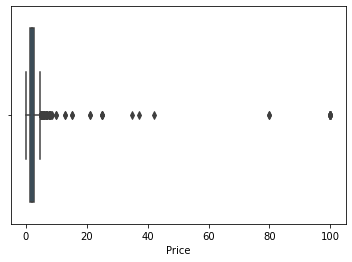

In [52]:
import seaborn as sns

sns.boxplot(data['Price'])

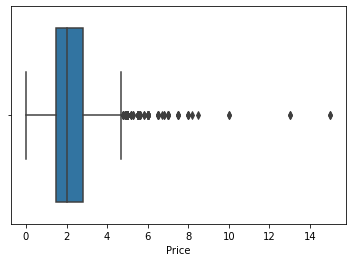

In [53]:
new_data = data[data['Price'] <= 15]
sns.boxplot(new_data['Price'])

In [55]:
new_data.loc[new_data["Kind"] == "CCMN", "Parking_slot"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Air_condition"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Heater_shower"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Inner_toilet"] = 1

new_data.loc[new_data["Kind"] == "Homestay", "Parking_slot"] = 1
new_data.loc[new_data["Kind"] == "Homestay", "Air_condition"] = 1
new_data.loc[new_data["Kind"] == "Homestay", "Heater_shower"] = 1

In [57]:
new_data.to_csv('processed-data/phongtro123.csv')